In [11]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 📊 Set visualization theme
sns.set(style="whitegrid")

###  Load and Explore the Dataset

In [12]:
# Dataset Path
df = pd.read_csv(
    'C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/association/groceries.csv',
    sep=',',
    on_bad_lines='skip'
)
print(df.shape)
df.head()

(6105, 4)


,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,NaN,NaN,NaN


In [13]:
# Check dataset dimensions
print("Total transactions:", df.shape[0])


Total transactions: 6105


### Step 3: Data Preprocessing

In [14]:
# Convert DataFrame rows into list of items per transaction
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Encode the transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 📈 Step 4: Apply Apriori Algorithm

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

# 🔁 Frequent itemsets with lower support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# ✅ Now generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 🔍 Show top 10 rules
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(soda),(bottled water),0.126618,0.066503,0.010811,0.085382,1.283879,1.0,0.002390,1.020641,0.253166,0.059299,0.020224,0.123972
1,(bottled water),(soda),0.066503,0.126618,0.010811,0.162562,1.283879,1.0,0.002390,1.042921,0.236862,0.059299,0.041155,0.123972
2,(other vegetables),(whole milk),0.086978,0.140704,0.014578,0.167608,1.191209,1.0,0.002340,1.032321,0.175808,0.068409,0.031309,0.135609
3,(whole milk),(other vegetables),0.140704,0.086978,0.014578,0.103609,1.191209,1.0,0.002340,1.018553,0.186800,0.068409,0.018215,0.135609
4,(rolls/buns),(sausage),0.126126,0.048157,0.013432,0.106494,2.211370,1.0,0.007358,1.065289,0.626854,0.083503,0.061288,0.192703
5,(sausage),(rolls/buns),0.048157,0.126126,0.013432,0.278912,2.211370,1.0,0.007358,1.211882,0.575507,0.083503,0.174837,0.192703
6,(rolls/buns),(soda),0.126126,0.126618,0.017854,0.141558,1.118000,1.0,0.001884,1.017405,0.120779,0.076011,0.017107,0.141284
7,(soda),(rolls/buns),0.126618,0.126126,0.017854,0.141009,1.118000,1.0,0.001884,1.017326,0.120847,0.076011,0.017031,0.141284


### 🔗 Step 5: Generate Association Rules

In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by='lift', ascending=False)

rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(sausage),(rolls/buns),0.048157,0.126126,0.013432,0.278912,2.211370,1.0,0.007358,1.211882,0.575507,0.083503,0.174837,0.192703
4,(rolls/buns),(sausage),0.126126,0.048157,0.013432,0.106494,2.211370,1.0,0.007358,1.065289,0.626854,0.083503,0.061288,0.192703
0,(soda),(bottled water),0.126618,0.066503,0.010811,0.085382,1.283879,1.0,0.002390,1.020641,0.253166,0.059299,0.020224,0.123972
1,(bottled water),(soda),0.066503,0.126618,0.010811,0.162562,1.283879,1.0,0.002390,1.042921,0.236862,0.059299,0.041155,0.123972
3,(whole milk),(other vegetables),0.140704,0.086978,0.014578,0.103609,1.191209,1.0,0.002340,1.018553,0.186800,0.068409,0.018215,0.135609
2,(other vegetables),(whole milk),0.086978,0.140704,0.014578,0.167608,1.191209,1.0,0.002340,1.032321,0.175808,0.068409,0.031309,0.135609
6,(rolls/buns),(soda),0.126126,0.126618,0.017854,0.141558,1.118000,1.0,0.001884,1.017405,0.120779,0.076011,0.017107,0.141284
7,(soda),(rolls/buns),0.126618,0.126126,0.017854,0.141009,1.118000,1.0,0.001884,1.017326,0.120847,0.076011,0.017031,0.141284


### 📊 Visualize Lift vs Confidence

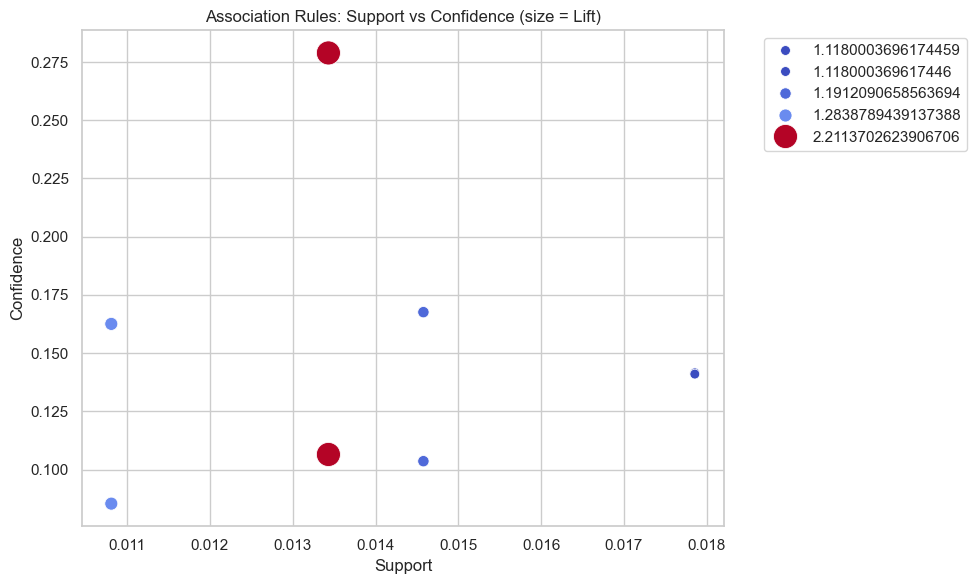

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette='coolwarm', sizes=(50, 300))
plt.title("Association Rules: Support vs Confidence (size = Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 🧠 Optional: Explore Strong Rules (e.g., lift > 3 and confidence > 0.5)

In [24]:
print(f"Number of frequent itemsets: {len(frequent_itemsets)}")
frequent_itemsets.head()


Number of frequent itemsets: 63


,support,itemsets
0,0.015561,(UHT-milk)
1,0.023915,(beef)
2,0.012285,(berries)
3,0.018346,(beverages)
4,0.066503,(bottled beer)


In [25]:
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)


tried with the lower threshold then.... 

In [32]:
# strong_rules = rules[(rules['lift'] > 3) & (rules['confidence'] > 0.5)]
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
0,beef,whole milk,0.021251,0.405039,1.585180
13,brown bread,whole milk,0.025216,0.388715,1.521293
15,butter,other vegetables,0.020031,0.361468,1.868122
17,butter,whole milk,0.027555,0.497248,1.946053
19,citrus fruit,other vegetables,0.028876,0.348894,1.803140
25,curd,whole milk,0.026131,0.490458,1.919481
27,domestic eggs,other vegetables,0.022267,0.350962,1.813824
28,domestic eggs,whole milk,0.029995,0.472756,1.850203
33,frozen vegetables,whole milk,0.020437,0.424947,1.663094
38,margarine,whole milk,0.024199,0.413194,1.617098


### Another Approach to do this

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data as a list of transactions (one line = one transaction)
with open("C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/association/groceries.csv", 'r') as file:
    transactions = [line.strip().split(',') for line in file]

# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

# Extract association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Format the output nicely
pd.set_option("display.max_columns", None)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                    antecedents                     consequents   support  \
0                        (beef)                    (whole milk)  0.021251   
1                  (whole milk)                          (beef)  0.021251   
2            (other vegetables)                 (bottled water)  0.024809   
3               (bottled water)              (other vegetables)  0.024809   
4                  (rolls/buns)                 (bottled water)  0.024199   
..                          ...                             ...       ...   
121  (other vegetables, yogurt)                    (whole milk)  0.022267   
122        (yogurt, whole milk)              (other vegetables)  0.022267   
123          (other vegetables)            (yogurt, whole milk)  0.022267   
124                (whole milk)      (other vegetables, yogurt)  0.022267   
125                    (yogurt)  (other vegetables, whole milk)  0.022267   

     confidence      lift  
0      0.405039  1.585180  
1      0.083168  1.

In [29]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,beef,whole milk,0.052466,0.255516,0.021251,0.405039,1.585180,1.0,0.007845,1.251315,0.389597,0.074113,0.200841,0.244103
1,whole milk,beef,0.255516,0.052466,0.021251,0.083168,1.585180,1.0,0.007845,1.033487,0.495856,0.074113,0.032402,0.244103
2,other vegetables,bottled water,0.193493,0.110524,0.024809,0.128219,1.160101,1.0,0.003424,1.020297,0.171116,0.088857,0.019894,0.176345
3,bottled water,other vegetables,0.110524,0.193493,0.024809,0.224471,1.160101,1.0,0.003424,1.039945,0.155154,0.088857,0.038411,0.176345
4,rolls/buns,bottled water,0.183935,0.110524,0.024199,0.131564,1.190373,1.0,0.003870,1.024228,0.195974,0.089541,0.023655,0.175258
5,bottled water,rolls/buns,0.110524,0.183935,0.024199,0.218951,1.190373,1.0,0.003870,1.044832,0.179800,0.089541,0.042909,0.175258
6,soda,bottled water,0.174377,0.110524,0.028978,0.166181,1.503577,1.0,0.009705,1.066750,0.405656,0.113230,0.062573,0.214185
7,bottled water,soda,0.110524,0.174377,0.028978,0.262190,1.503577,1.0,0.009705,1.119017,0.376535,0.113230,0.106359,0.214185
8,whole milk,bottled water,0.255516,0.110524,0.034367,0.134501,1.216940,1.0,0.006126,1.027703,0.239450,0.103617,0.026956,0.222724
9,bottled water,whole milk,0.110524,0.255516,0.034367,0.310948,1.216940,1.0,0.006126,1.080446,0.200417,0.103617,0.074456,0.222724


In [30]:
strong_rules = rules[(rules['confidence'] > 0.3) & (rules['lift'] > 1.5)]
print(f"Number of strong rules: {len(strong_rules)}")
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Number of strong rules: 29


,antecedents,consequents,support,confidence,lift
0,beef,whole milk,0.021251,0.405039,1.585180
13,brown bread,whole milk,0.025216,0.388715,1.521293
15,butter,other vegetables,0.020031,0.361468,1.868122
17,butter,whole milk,0.027555,0.497248,1.946053
19,citrus fruit,other vegetables,0.028876,0.348894,1.803140
25,curd,whole milk,0.026131,0.490458,1.919481
27,domestic eggs,other vegetables,0.022267,0.350962,1.813824
28,domestic eggs,whole milk,0.029995,0.472756,1.850203
33,frozen vegetables,whole milk,0.020437,0.424947,1.663094
38,margarine,whole milk,0.024199,0.413194,1.617098


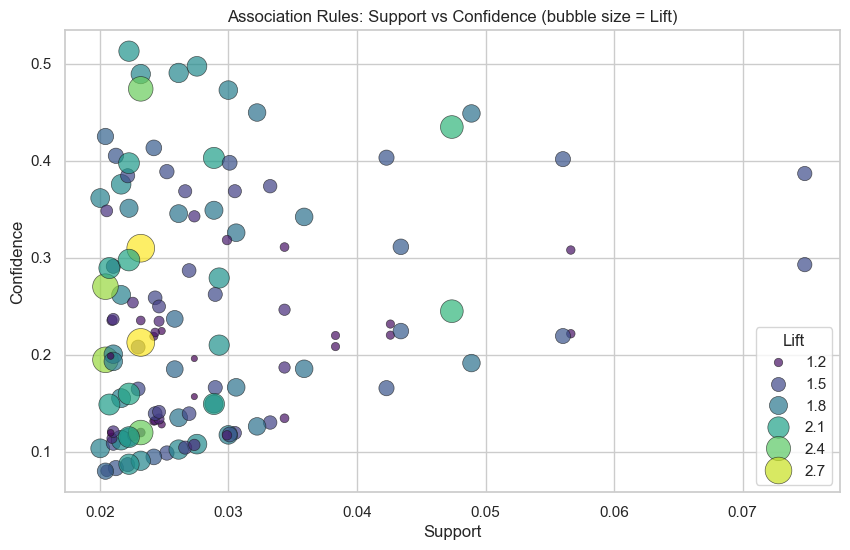

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rules,
    x='support',
    y='confidence',
    size='lift',
    hue='lift',
    palette='viridis',
    sizes=(20, 400),
    alpha=0.7,
    edgecolor='k'
)
plt.title('Association Rules: Support vs Confidence (bubble size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.grid(True)
plt.show()
